[Reference](https://medium.com/data-bistrot/python-three-types-of-analytics-7a1f74fa09ac)

# Using Python for Descriptive Analytics

In [1]:
import pandas as pd

# Sample dataset
data_dict = {
    'Month': ['January', 'January', 'February', 'February', 'March', 'March', 'April', 'April', 'May', 'May'],
    'Revenue': [10000, 15000, 12000, 13000, 14000, 16000, 17000, 18000, 19000, 20000],
    'Customers': [100, 120, 110, 115, 130, 140, 150, 160, 170, 180]
}

# Convert the dictionary into a DataFrame
data = pd.DataFrame(data_dict)

# Mapping of month names to month numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5
}

# Add a month number column
data['Month_Number'] = data['Month'].map(month_mapping)

# Summarize the dataset
summary = data.describe()

# Print the summary
print(summary)

# Calculate the mean revenue
mean_revenue = data['Revenue'].mean()
print(f"Mean Revenue: {mean_revenue}")

# Aggregate data by month
monthly_data = data.groupby(['Month', 'Month_Number']).agg({'Revenue': 'sum', 'Customers': 'count'}).sort_values(by='Month_Number')

# Drop the Month_Number column as it's no longer needed after sorting
monthly_data = monthly_data.reset_index(drop=False).drop(columns='Month_Number').set_index('Month')

# Print the monthly aggregated data sorted by month number
print(monthly_data)

            Revenue   Customers  Month_Number
count     10.000000   10.000000     10.000000
mean   15400.000000  137.500000      3.000000
std     3204.163958   27.003086      1.490712
min    10000.000000  100.000000      1.000000
25%    13250.000000  116.250000      2.000000
50%    15500.000000  135.000000      3.000000
75%    17750.000000  157.500000      4.000000
max    20000.000000  180.000000      5.000000
Mean Revenue: 15400.0
          Revenue  Customers
Month                       
January     25000          2
February    25000          2
March       30000          2
April       35000          2
May         39000          2


In [2]:
pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=535d33fabbd4b477108170c33ace6de2c96722c2f5185b98f520705eeda13a52
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# Prescriptive Analytics

In [3]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365)
store_ids = [1, 2, 3]

data = []
for store_id in store_ids:
    sales = np.random.poisson(lam=20, size=365) + 5 * np.sin(np.linspace(0, 2 * np.pi, 365))
    inventory = np.random.randint(10, 100, size=365)
    for date, sale, stock in zip(dates, sales, inventory):
        data.append([store_id, date, sale, stock])

# Create DataFrame
df = pd.DataFrame(data, columns=['StoreID', 'Date', 'Sales', 'Inventory'])

# Display the first few rows of the dataset
print(df.head())

   StoreID       Date      Sales  Inventory
0        1 2023-01-01  23.000000         94
1        1 2023-01-02  15.086303         36
2        1 2023-01-03  21.172581         66
3        1 2023-01-04  25.258807         40
4        1 2023-01-05  15.344956         15


In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data
df.sort_values(by=['StoreID', 'Date'], inplace=True)

# Check for missing values
print(df.isnull().sum())

StoreID      0
Date         0
Sales        0
Inventory    0
dtype: int64


In [5]:
# Add month and day of the week as features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Calculate rolling mean to capture trends
df['SalesRollingMean'] = df.groupby('StoreID')['Sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

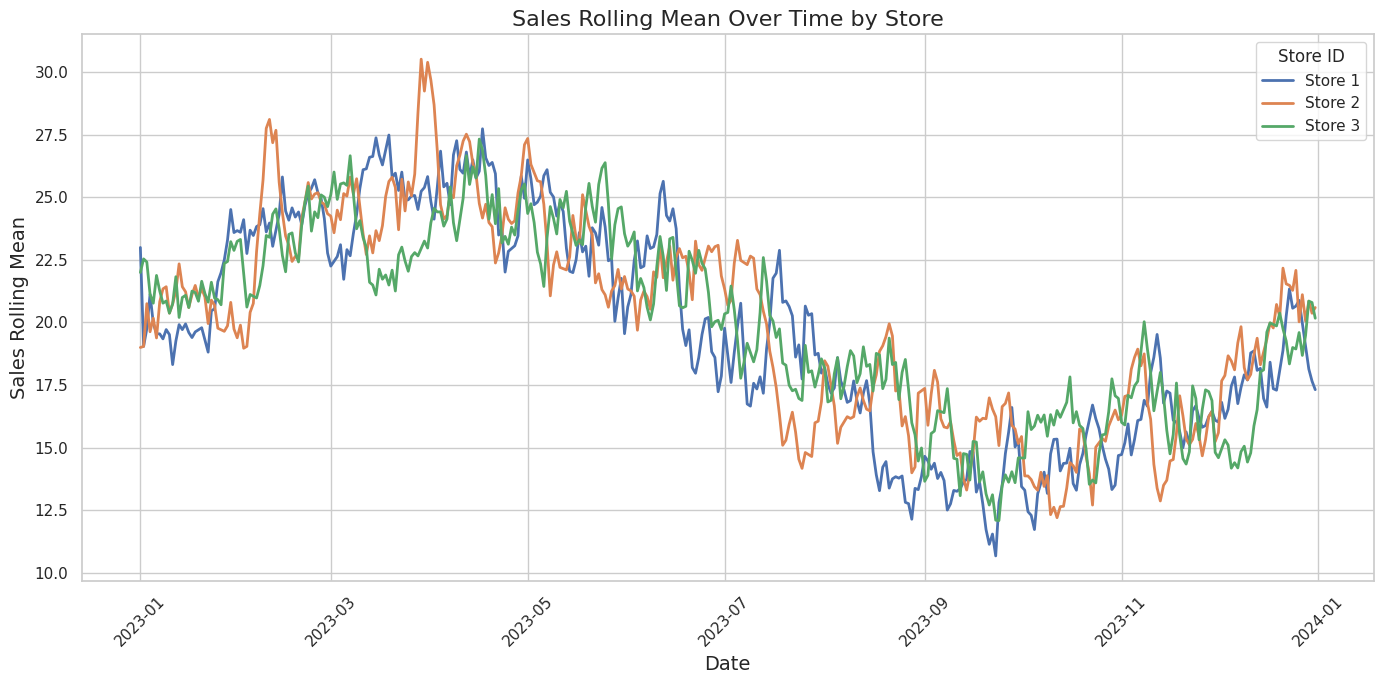

In [6]:
# Plotting the SalesRollingMean
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create a line plot for each store
for store_id in df['StoreID'].unique():
    store_data = df[df['StoreID'] == store_id]
    plt.plot(store_data['Date'], store_data['SalesRollingMean'], label=f'Store {store_id}', linewidth=2)

# Add titles and labels
plt.title('Sales Rolling Mean Over Time by Store', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Rolling Mean', fontsize=14)
plt.legend(title='Store ID')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the features and target variable
features = ['Month', 'DayOfWeek', 'SalesRollingMean']
X = df[features]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 4.72408119909539


In [8]:
from scipy.optimize import linprog

# Define the optimization problem
# Objective: Minimize inventory costs while meeting predicted demand

# Sample cost and demand data for the example
inventory_cost = 1  # Cost per unit of inventory
shortage_cost = 10  # Cost per unit of unmet demand

# Get the predictions for the next 7 days
future_dates = pd.date_range(start='2024-01-01', periods=7)
future_data = pd.DataFrame({'Month': future_dates.month, 'DayOfWeek': future_dates.dayofweek, 'SalesRollingMean': df['SalesRollingMean'].iloc[-7:].values})
future_predictions = model.predict(future_data)

# Define the cost function
costs = np.array([inventory_cost] * 7 + [shortage_cost] * 7)

# Define the constraints
A_eq = np.zeros((7, 14))
for i in range(7):
    A_eq[i, i] = 1
    A_eq[i, i + 7] = -1

b_eq = future_predictions

# Define the bounds for the variables
bounds = [(0, None)] * 14

# Run the optimization
result = linprog(c=costs, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Extract the optimized inventory levels
optimal_inventory = result.x[:7]

# Print the recommended inventory levels
print("Recommended Inventory Levels for the Next 7 Days:")
for date, inv in zip(future_dates, optimal_inventory):
    print(f"{date.date()}: {inv:.2f} units")

Recommended Inventory Levels for the Next 7 Days:
2024-01-01: 16.84 units
2024-01-02: 17.45 units
2024-01-03: 14.45 units
2024-01-04: 19.20 units
2024-01-05: 22.53 units
2024-01-06: 20.27 units
2024-01-07: 19.25 units
